In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
data = pd.read_csv("diabetes.csv")

In [99]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [101]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [103]:
data.info()
#this is to know how many null value are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [105]:
# to see if there is any null or not
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [107]:
data.duplicated().sum()

1256

In [109]:
duplicates = data[data.duplicated()]
print(duplicates)


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
483             0       84             82             31      125  38.2   
484             0      145              0              0        0  44.2   
485             0      135             68             42      250  42.3   
486             1      139             62             41      480  40.7   
487             0      173             78             32      265  46.5   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
483                      0.233   23        0  
484  

In [111]:
# so i need the duplicate because i need them so i left it 


In [113]:
# Let me move to Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

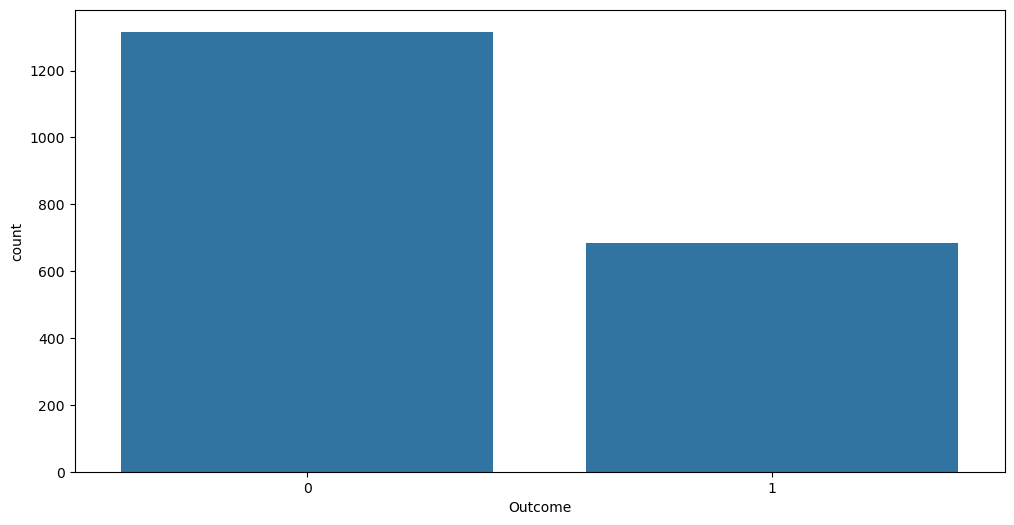

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(x ="Outcome", data=data)   # this is to show the posetivity of diabets or not
plt.show

In [116]:
# lets see outliers to see the expected or unexpected values

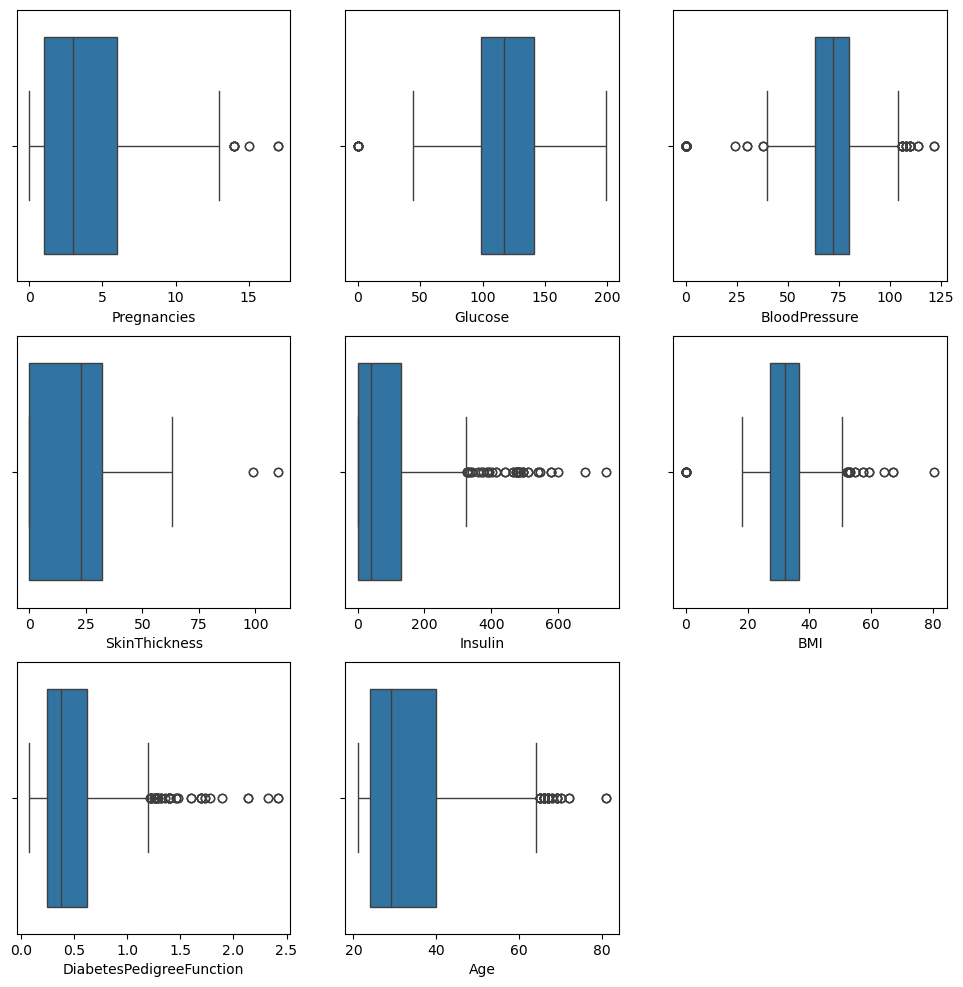

In [120]:
plt.figure(figsize=(12,12))
for i, col in enumerate (['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col,data=data)

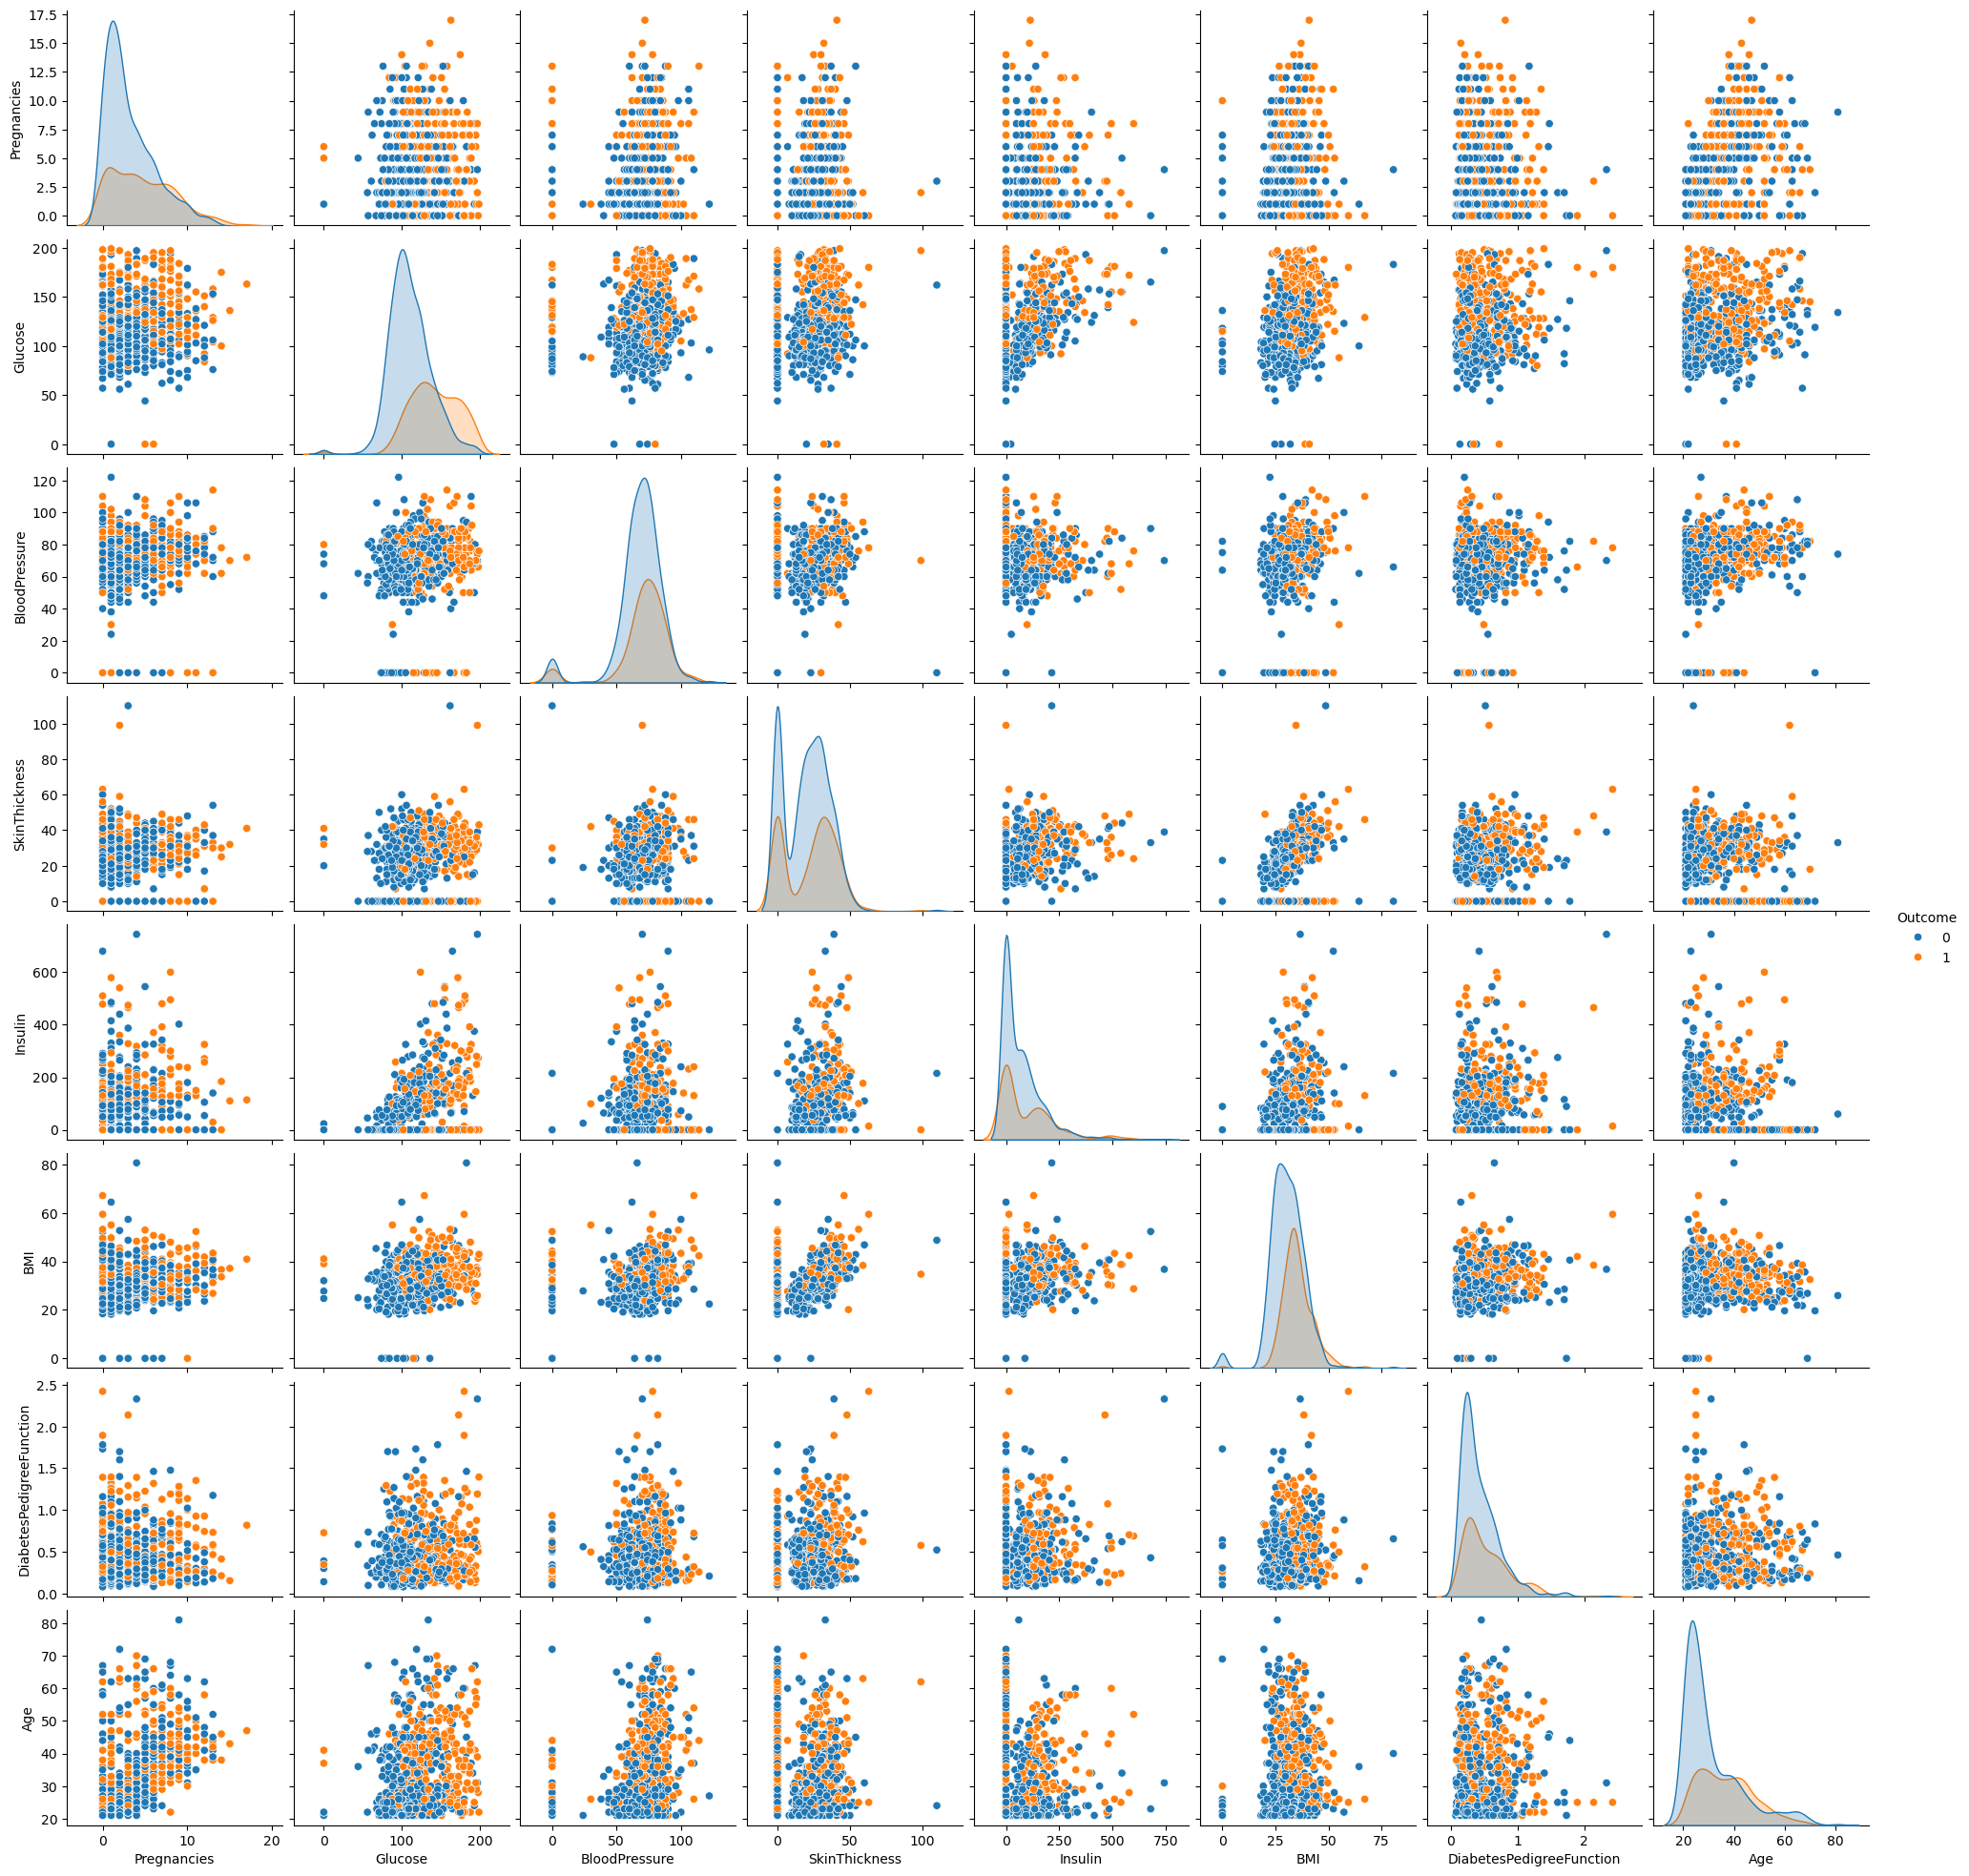

In [121]:
sns.pairplot(data,hue='Outcome')
plt.show()

In [122]:
# the above pairplot draw for every columen the orange color is having diabet and blue means not having diabets

In [123]:
# The below is histplot

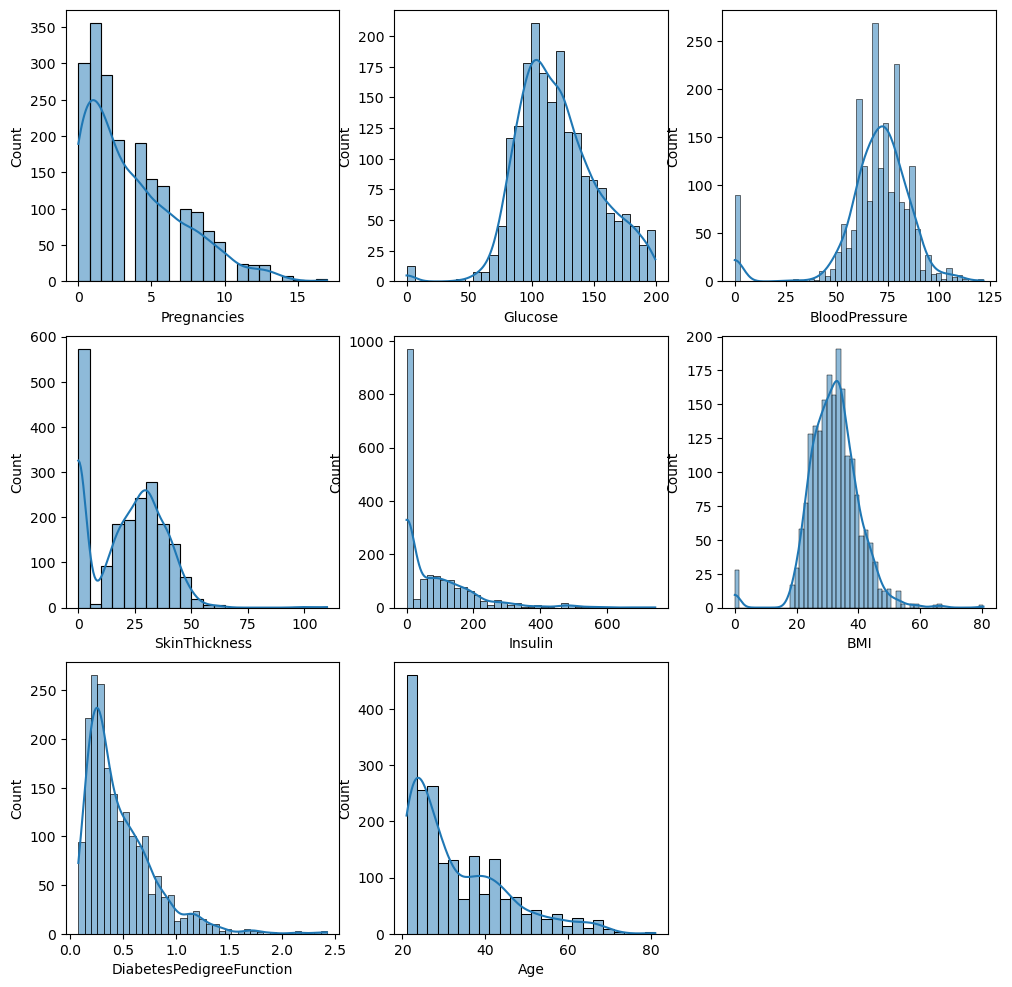

In [125]:
plt.figure(figsize=(12,12))
for i, col in enumerate (['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3,3,i+1)
    sns.histplot(x=col,data=data, kde=True)
plt.show()    

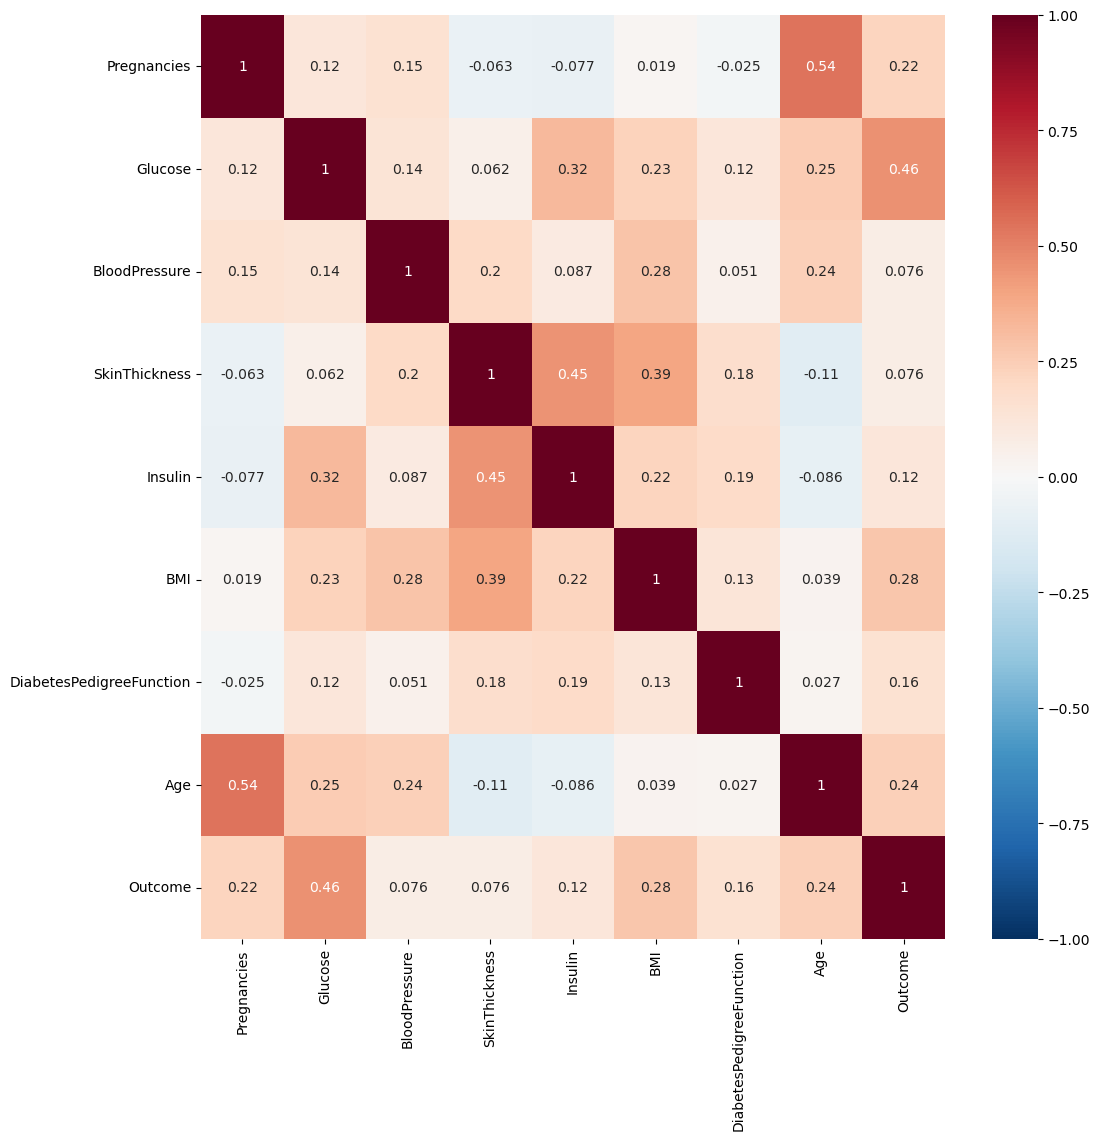

In [126]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [127]:
# the above is the correlation of columens

In [128]:
# Handle Missing Values

In [129]:
# Check for missing values
print(data.isnull().sum())

# Impute missing values with the mean (for numerical columns)
data.fillna(data.mean(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [130]:
# Scale or Normalize Numerical Features

In [131]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [132]:
# Standard scaling and Label Encoding and prepare a model

In [134]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
sc_x = StandardScaler()

# Fit and transform the data, excluding the 'Outcome' column
X = pd.DataFrame(sc_x.fit_transform(data.drop(["Outcome"], axis=1)),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [135]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055


In [136]:
# as we see the outcome is not there the because the outcome will go to Y

In [138]:
y= data['Outcome']

In [139]:
#now we will do train test split 

In [140]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [141]:
#for this i use K-nignbor classifier whisch is a modeling algorithm under classification

In [142]:
from sklearn.neighbors import  KNeighborsClassifier


test_scores =[]
train_scores =[]

for i in range(1,15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))






In [143]:
max_train_score = max(train_scores)
train_score_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score * 100, list(map(lambda x: x + 1, train_score_index))))


Max Train score 100.0 % and k = [1]


In [144]:
max_test_score = max(test_scores)  # Find the maximum score in test_scores
test_score_index = [i for i, v in enumerate(test_scores) if v == max_test_score]  # Get indices of max scores
print("Max Test score {} % and k = {}".format(max_test_score * 100, list(map(lambda x: x + 1, test_score_index))))  # Print results


Max Test score 96.5 % and k = [1]


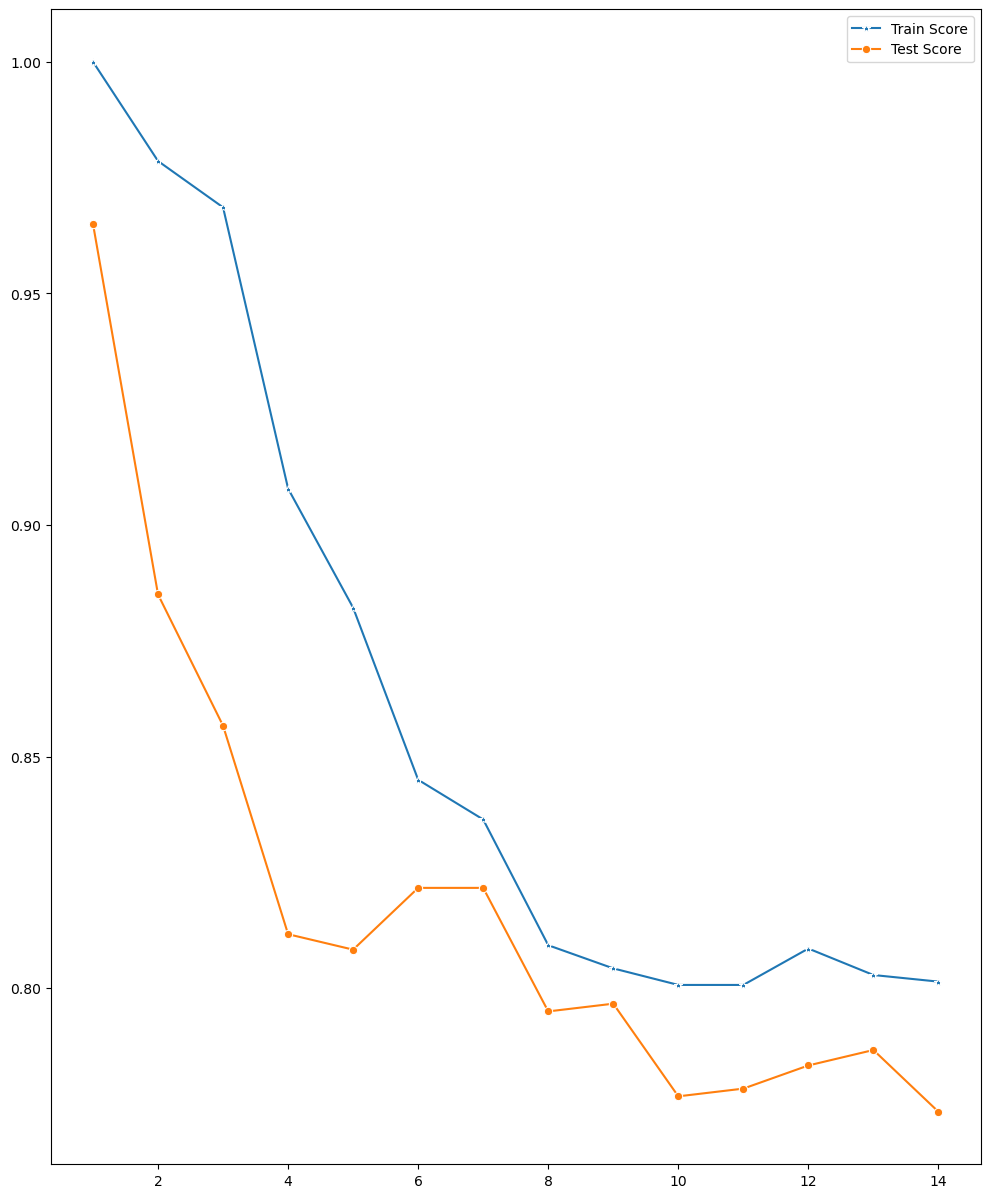

In [145]:
plt.figure(figsize =(12,15))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label="Train Score")
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label="Test Score")



In [146]:
# using these k value we can create a model

In [147]:
knn = KNeighborsClassifier (1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.965

In [148]:
# now lets check the models performance

In [149]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[390,   7],
       [ 14, 189]], dtype=int64)

In [150]:
# the above show that 340 and 189 is confusion matrix that is diagonal value that are correctly predicted that is true posetive and true negative
# 7 and 14 are false posetive and false negative

In [152]:
# bow lets prit the classification report

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       397
           1       0.96      0.93      0.95       203

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [154]:
pip install fastapi uvicorn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [155]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(knn, f)

print("Model saved successfully!")


Model saved successfully!


Model saved successfully!
